# Aviation Accidents Analysis
Aviation Accidents are less frequent compared to road accidents, but when they occur, they often have a lower survival rate and more severe consequences.
The goal of this notebook is to analyze aviation accident data in order to understand:
* How the accidents have changed overtime
* How distribution of accidents across aircraft types, operators, and countries.
* The relationship between accidents and fatalities

This aims to provide insights that can help improve aviation safety and reduce the risk of future accidents.

# Importing the libraries

In [253]:
import pandas as pd
import numpy as np
import csv

# Importing the dataset using pandas datareader. 

In [254]:
data = pd.read_csv("./Data/aviation-accident-data-2023-05-16.csv")
data.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


The dataset contains detailed records of aviation accidents, including information such as date, aircraft type, operator, registration number of the aircraft, fatalities, location, year the accident occured and the type of accident.

Checking the number of rows and columns.
the data types in each row and also the number of null values in the columns

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [256]:
# detecting null values in each column
data.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

# Data cleaning

In [257]:
# checking the unique values in the country column
data['country'].unique()

array(['Unknown country', 'Russia', 'Eritrea', 'Libya', 'Poland', '?',
       'India', 'Bulgaria', 'Bahamas', 'Zimbabwe', 'Mauritania', 'Cyprus',
       'Mexico', 'New Caledonia', 'Honduras', 'Peru', 'Kenya',
       'Antarctica', 'Latvia', 'Yemen', 'Ukraine', 'France', 'Liberia',
       'Italy', 'U.K.', 'South Africa', 'Sudan', 'Sweden', 'Cuba',
       'Belgium', 'China', 'Atlantic Ocean', 'Netherlands', 'Germany',
       'USA', 'Iran', 'Chile', 'Israel', 'Argentina', 'P.N. Guinea',
       'Nicaragua', 'Czech Rep.', 'Dominican Rep.', 'Brazil',
       'Mediterranean Sea', 'Indonesia', 'Egypt', 'Bolivia', 'Spain',
       'Australia', 'Iraq', 'Guatemala', 'Malta', 'Colombia',
       'Switzerland', 'Austria', 'Uganda', 'Trinidad & Tobago', 'Norway',
       'Greece', 'Algeria', 'Pakistan', 'Panama', 'Romania', 'Morocco',
       'Pacific Ocean', 'Hungary', 'Jamaica', 'Japan', 'Canada', 'Gambia',
       'Thailand', 'Philippines', 'Ecuador', 'Puerto Rico', 'Venezuela',
       'Mozambique', 'Si

In [258]:
# checking for the duplicate values in the dataset.
data.duplicated().value_counts()

False    23852
True       115
dtype: int64

In [259]:
# dropping the duplicate values
data.drop_duplicates(inplace=True)

In [260]:
# confirming if the duplicate values were dropped
data.duplicated().value_counts()

False    23852
dtype: int64

Cleaning the Country column

In [261]:
# replacing the unknown values in the country column with NaN
data["country"] = data["country"].replace(
    ["Unknown country", "?", "unknown country"], 
    np.nan
)

In [262]:
# Filling the NaN values in the country column with "Unknown"
data["country"] = data["country"].fillna("Unknown")


Cleaning the Operator column

In [263]:
# checking the unique value in the column
data['operator'].unique()

array(['Indonesian AF', 'Soviet AF',
       'GUSMP, Directorate of Polar Aviation', ...,
       'Angkasa Super Services', 'Nasional Global Aviasi', 'Bar Aviation'],
      dtype=object)

In [264]:
# filling the NAN values with "unknown"
data['operator']= data['operator'].fillna('unknown')

Cleaning the location column

In [265]:
# checking the unique values in the column
data['location'].unique()

array([nan, 'Tiksi Airport (IKS)', 'Massawa Airport ...', ...,
       'Fentheik Airstrip', 'Kampala-Kajjansi...', 'Hohn Air Base'],
      dtype=object)

In [266]:
# filling the NAN values with "unkown"
data['location']= data['location'].fillna('unkown')

In [267]:
data.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,unkown,Unknown,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,unkown,Unknown,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,unkown,Unknown,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [268]:
# checking for the unique values in the registration column
data['registration'].nunique()

21962

In [269]:
# filling the Nan values in he column with "unknown"
data["registration"] = data["registration"].fillna('unknown')


In [270]:
data['date'].unique()

array(['date unk.', '02-AUG-1919', '11-AUG-1919', ..., '12-MAY-2023',
       '14-MAY-2023', '15-MAY-2023'], dtype=object)

In [271]:
data["date"]=data["date"].replace('date unk.', 'uknown')
data


,date,type,registration,operator,fatalities,location,country,cat,year
0,uknown,Antonov An-12B,T-1206,Indonesian AF,NaN,unkown,Unknown,U1,unknown
1,uknown,Antonov An-12B,T-1204,Indonesian AF,NaN,unkown,Unknown,U1,unknown
2,uknown,Antonov An-12B,T-1201,Indonesian AF,NaN,unkown,Unknown,U1,unknown
3,uknown,Antonov An-12BK,unknown,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,uknown,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [272]:
data['date'].unique()

array(['uknown', '02-AUG-1919', '11-AUG-1919', ..., '12-MAY-2023',
       '14-MAY-2023', '15-MAY-2023'], dtype=object)

In [273]:
data.isna().sum()

date               0
type               0
registration       0
operator           0
fatalities      3833
location           0
country            0
cat                0
year               0
dtype: int64

In [274]:
data

,date,type,registration,operator,fatalities,location,country,cat,year
0,uknown,Antonov An-12B,T-1206,Indonesian AF,NaN,unkown,Unknown,U1,unknown
1,uknown,Antonov An-12B,T-1204,Indonesian AF,NaN,unkown,Unknown,U1,unknown
2,uknown,Antonov An-12B,T-1201,Indonesian AF,NaN,unkown,Unknown,U1,unknown
3,uknown,Antonov An-12BK,unknown,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,uknown,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [275]:
data['date'].isna().value_counts()

False    23852
Name: date, dtype: int64

In [276]:
data = data[data["year"] != "unknown"].reset_index(drop=True)
data


,date,type,registration,operator,fatalities,location,country,cat,year
0,02-AUG-1919,Caproni Ca.48,unknown,Caproni,14,Verona,Italy,A1,1919
1,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919
2,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920
3,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920
4,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920
...,...,...,...,...,...,...,...,...,...
23786,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23787,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23788,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23789,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [277]:
import numpy as np

# Replace 'unknown' with NaN first (so it won't break math)
data['fatalities'] = data['fatalities'].replace('unknown', np.nan)

# If fatalities has values like "5+1", split and sum them
def sum_fatalities(x):
    if pd.isna(x):  # handle NaN
        return np.nan
    if '+' in str(x):  # e.g. "5+1"
        return sum(map(int, x.split('+')))
    else:
        return int(x)  # single number

data['fatalities_sum'] = data['fatalities'].apply(sum_fatalities)


In [278]:
data.head(40)

,date,type,registration,operator,fatalities,location,country,cat,year,fatalities_sum
0,02-AUG-1919,Caproni Ca.48,unknown,Caproni,14,Verona,Italy,A1,1919,14.0
1,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919,1.0
2,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,0.0
3,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920,0.0
4,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,0.0
5,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920,4.0
6,15-JAN-1921,Aeromarine 75,unknown,Aeromarine Airways,0,Havana harbour,Cuba,O1,1921,0.0
7,02-MAR-1921,Handley Page O/7,G-IAAC,HP Indo-Burmese Transport,0,Meerut,India,O1,1921,0.0
8,04-MAR-1921,Caproni Ca.60 Noviplano,unknown,Caproni,0,Lago Maggiore,Italy,A1,1921,0.0
9,26-AUG-1921,Farman F.60 Goliath,O-BLAN,SNETA,2,near Calais [The Engl...,France,A1,1921,2.0


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23791 entries, 0 to 23790
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            23791 non-null  object 
 1   type            23791 non-null  object 
 2   registration    23791 non-null  object 
 3   operator        23791 non-null  object 
 4   fatalities      19994 non-null  object 
 5   location        23791 non-null  object 
 6   country         23791 non-null  object 
 7   cat             23791 non-null  object 
 8   year            23791 non-null  object 
 9   fatalities_sum  19994 non-null  float64
dtypes: float64(1), object(9)
memory usage: 1.8+ MB


In [280]:
data['fatalities_sum'] = pd.to_numeric(
    data['fatalities_sum'].replace(np.nan), 
    errors='coerce'
).astype('Int64')

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23791 entries, 0 to 23790
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            23791 non-null  object
 1   type            23791 non-null  object
 2   registration    23791 non-null  object
 3   operator        23791 non-null  object
 4   fatalities      19994 non-null  object
 5   location        23791 non-null  object
 6   country         23791 non-null  object
 7   cat             23791 non-null  object
 8   year            23791 non-null  object
 9   fatalities_sum  23791 non-null  Int64 
dtypes: Int64(1), object(9)
memory usage: 1.8+ MB


In [282]:
# Checking the columns that still have null values
data.isna().sum()

date                 0
type                 0
registration         0
operator             0
fatalities        3797
location             0
country              0
cat                  0
year                 0
fatalities_sum       0
dtype: int64

Decided to leave the fatalities column withe null values since i won't use it and replacing the null value might bring confusion in the fatalities_sum column

In [283]:
data.head(20)

,date,type,registration,operator,fatalities,location,country,cat,year,fatalities_sum
0,02-AUG-1919,Caproni Ca.48,unknown,Caproni,14,Verona,Italy,A1,1919,14
1,11-AUG-1919,Felixstowe Fury,N123,RAF,1,near Felixtowe RNAS,U.K.,A1,1919,1
2,23-FEB-1920,Handley Page O/7,G-EANV,Handley Page Transport,0,"Acadia Siding, C...",South Africa,A1,1920,0
3,25-FEB-1920,Handley Page O/400,G-EAMC,Handley Page Transport,0,near El Shereik,Sudan,A1,1920,0
4,30-JUN-1920,Handley Page O/400,G-EAKE,Handley Page Transport,0,ÃstanÃ¥,Sweden,A1,1920,0
5,14-DEC-1920,Handley Page O/400,G-EAMA,Handley Page Transport,4,Golders Green,U.K.,A1,1920,4
6,15-JAN-1921,Aeromarine 75,unknown,Aeromarine Airways,0,Havana harbour,Cuba,O1,1921,0
7,02-MAR-1921,Handley Page O/7,G-IAAC,HP Indo-Burmese Transport,0,Meerut,India,O1,1921,0
8,04-MAR-1921,Caproni Ca.60 Noviplano,unknown,Caproni,0,Lago Maggiore,Italy,A1,1921,0
9,26-AUG-1921,Farman F.60 Goliath,O-BLAN,SNETA,2,near Calais [The Engl...,France,A1,1921,2


In [284]:
#created a variable that counts the number of entries for each year and sorts them in asc order
#value_counts() counts the number of unique entries for that variable, so 1919 = 2, means there are two entries for 1919
accidents_per_year = data['year'].value_counts().sort_index()
print(accidents_per_year)

1919      2
1920      4
1921      7
1922      3
1923      8
       ... 
2019    245
2020    203
2021    183
2022    168
2023     56
Name: year, Length: 105, dtype: int64


# Data Visualization

Importing the relevant libraries for data visualization


In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
# checking the names of the columns to avoid confusion of names
data.columns

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year', 'fatalities_sum'],
      dtype='object')

In [287]:
# checking the datatype in the columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23791 entries, 0 to 23790
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            23791 non-null  object
 1   type            23791 non-null  object
 2   registration    23791 non-null  object
 3   operator        23791 non-null  object
 4   fatalities      19994 non-null  object
 5   location        23791 non-null  object
 6   country         23791 non-null  object
 7   cat             23791 non-null  object
 8   year            23791 non-null  object
 9   fatalities_sum  23791 non-null  Int64 
dtypes: Int64(1), object(9)
memory usage: 1.8+ MB


In [288]:
# converting te column year into an integer
data['year'] = pd.to_numeric(data['year']).astype(int)

# Objective
### What was the geographical spread of accidents over time?
### To analyze the number of unique countries that reported aviation accidents each year.

In [289]:
# created a variable inorder to groupby the column year and country and check the number of unique values 
country_per_year = data.groupby('year')['country'].nunique()
print(country_per_year)

year
1919     2
1920     4
1921     5
1922     2
1923     4
        ..
2019    61
2020    55
2021    53
2022    51
2023    16
Name: country, Length: 105, dtype: int64


In [290]:
# created a variable inorder to groupby the column year and country and check the number of unique values 
country_per_year = data.groupby('year')['country'].nunique()
print(country_per_year)

year
1919     2
1920     4
1921     5
1922     2
1923     4
        ..
2019    61
2020    55
2021    53
2022    51
2023    16
Name: country, Length: 105, dtype: int64


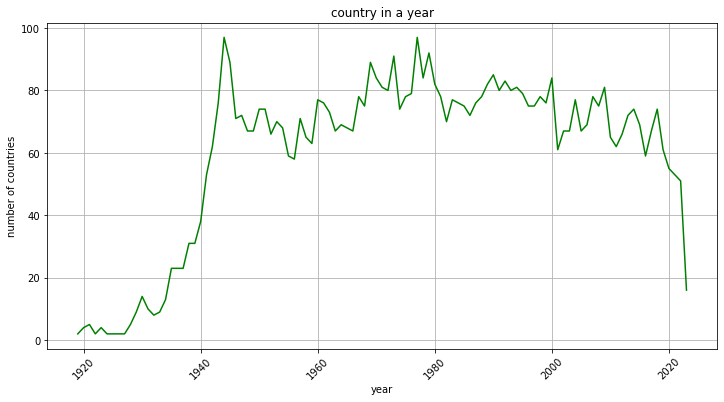

In [291]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(country_per_year.index, country_per_year.values, color='green')
ax.set_xlabel('year')
ax.set_ylabel('number of countries')
ax.set_title('country in a year')
plt.xticks(rotation=45)
plt.grid()
plt.show()


The line graph shows how many different countries experienced aviation accidents each year.

In the early years 1919–1940, accidents were concentrated in fewer countries. But in 2020 the number of accidents decreased.

As aviation expanded globally, the number of countries reporting accidents steadily increased.

In recent decades, accidents span across many countries, reflecting both the globalization of air travel and improved reporting systems.

# 

Grouping year and fatalities for visualization.

In [292]:
fatalities_per_year =data.groupby('year')['fatalities_sum'].sum()

print(fatalities_per_year)

year
1919     15
1920      4
1921      2
1922     19
1923     12
       ... 
2019    471
2020    464
2021    330
2022    293
2023     88
Name: fatalities_sum, Length: 105, dtype: Int64


In [293]:
type(fatalities_per_year)

pandas.core.series.Series

# Objective
### What was the number of fatalities in the years
### To analyze the yearly trend of aviation accident fatalities in order to identify periods with higher or lower fatality counts.

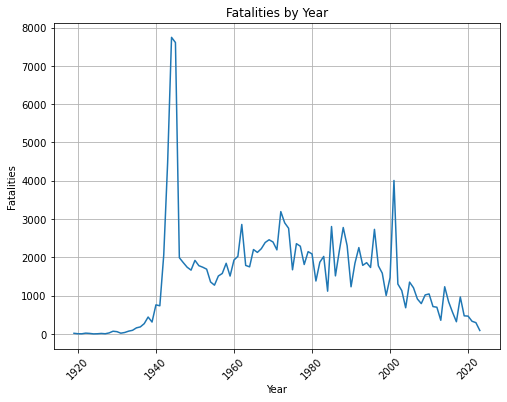

In [294]:
plt.figure(figsize=(8,6))

fatalities_per_year.plot()   # directly plotting the Series

plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.title("Fatalities by Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Insight

The line graph shows how aviation accident fatalities have fluctuated over the years:

There are noticeable spikes in certain years, indicating major aviation disasters.

Over time, despite occasional peaks, the overall trend appears to decline, suggesting improvements in aviation safety standards, technology, and regulations.

Recent years show relatively fewer fatalities, though accidents are not completely eliminated.


#
#
# Objective
How many countries had the highest number of fatalities?
To identify the top 10 countries with the highest number of aviation accident fatalities.

In [295]:
# Grouping country and the fatalities in each country
fatalities_per_country = data.groupby('country')['fatalities_sum'].sum().sort_values(ascending=False).head(10)

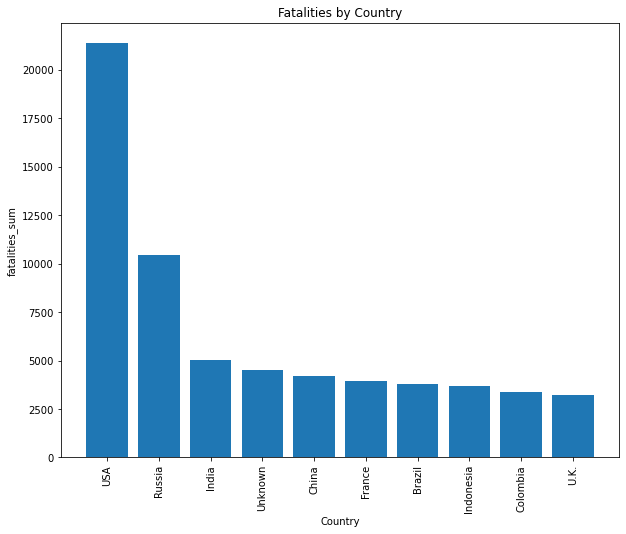

In [296]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(fatalities_per_country.index, fatalities_per_country.values)
ax.set_xlabel('Country')
ax.set_ylabel('fatalities_sum')
ax.set_title('Fatalities by Country')
plt.xticks(rotation = 90) # for the x-axis scale
plt.show()

# Insight
The bar chart highlights the 10 countries with the highest recorded fatalities from aviation accidents: 

Certain countries dominate the chart, which may reflect a higher volume of air traffic, larger populations, or limitations in aviation infrastructure and safety measures.

Countries with major international hubs or vast airspace are more likely to have higher fatalities.

The chart emphasizes that aviation safety challenges are not evenly distributed across the world but concentrated in certain regions.

#
#
# Objective
### What are the top 20 countries with the highest number of accidents
### To identify the top 20 countries with the highest number of aviation accidents.

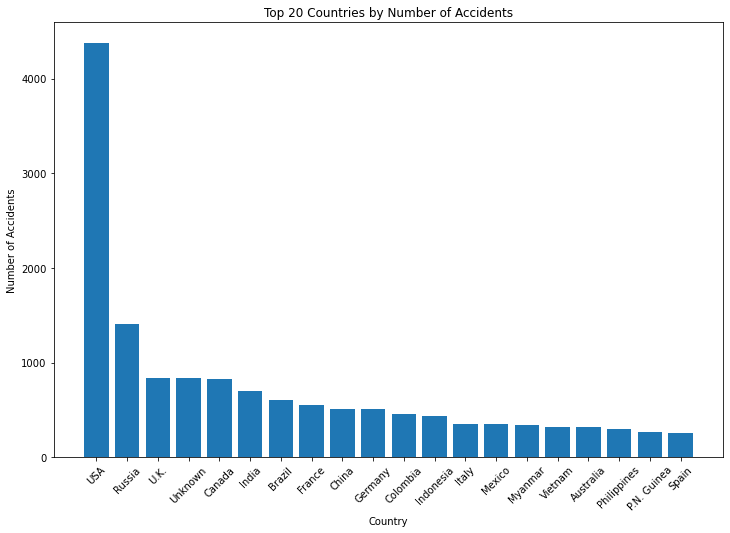

In [297]:
# Grouping country and the fatalities sum.
Accidents_per_country = data.groupby('country').size()
# Select top 20 countries with most accidents
top_countries = Accidents_per_country.sort_values(ascending=False).head(20)

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(top_countries.index, top_countries.values)
ax.set_xlabel('Country')
ax.set_ylabel('Number of Accidents')
ax.set_title('Top 20 Countries by Number of Accidents')
plt.xticks(rotation=45)
plt.show()


# Insights
USA and Russia had the largest number of accidents mmaybe because the countries have high air traffic volume.

This metric differs from fatalities because a high number of accidents doesn’t always mean more deaths. it can also indicate better reporting or a larger aviation footprint.

The chart reinforces the idea that aviation risks are concentrated in specific regions, helping prioritize where preventive measures like stricter safety inspections or pilot training could make the most difference.

In [298]:
data.columns

Index(['date', 'type', 'registration', 'operator', 'fatalities', 'location',
       'country', 'cat', 'year', 'fatalities_sum'],
      dtype='object')

In [299]:
data['cat'].unique()

array(['A1', 'O1', 'U1', 'A2', 'H2', 'C1', 'C2', 'H1', 'O2', 'I2', 'I1'],
      dtype=object)

# Objective
#### Which category of accident caused the highest number of accident?
#### To analyze how aviation accidents are distributed across different accident categories.

In [300]:
accidents_per_cat= data.groupby('cat').size()

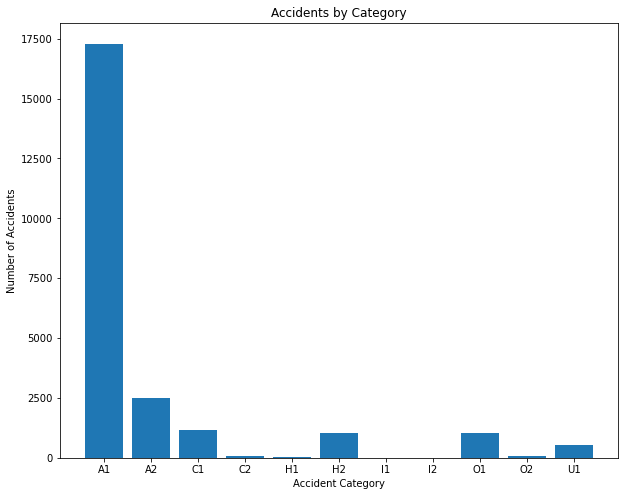

In [301]:


fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(accidents_per_cat.index, accidents_per_cat.values)
ax.set_xlabel('Accident Category')
ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents by Category')
plt.show()


This shows that the category that caused more accidents is A1 which is Accident, Hijacking(H) also led to higher number of accidents.
By identifying the categories with the highest accident counts, aviation stakeholders can target resources and safety measures where they are most needed.

Checking the number of accidents that occured in each operator. I also selected the top 20 operators with the highest number of accidents

# Objective
Which operators had the highest number of accidents and the lowest number of accidents?.
To identify the operators most frequently involved in aviation accidents and evaluate if specific airlines or organizations have higher accident counts compared to others.

In [302]:
# Count accidents per operator
accidents_per_operator = data['operator'].value_counts()


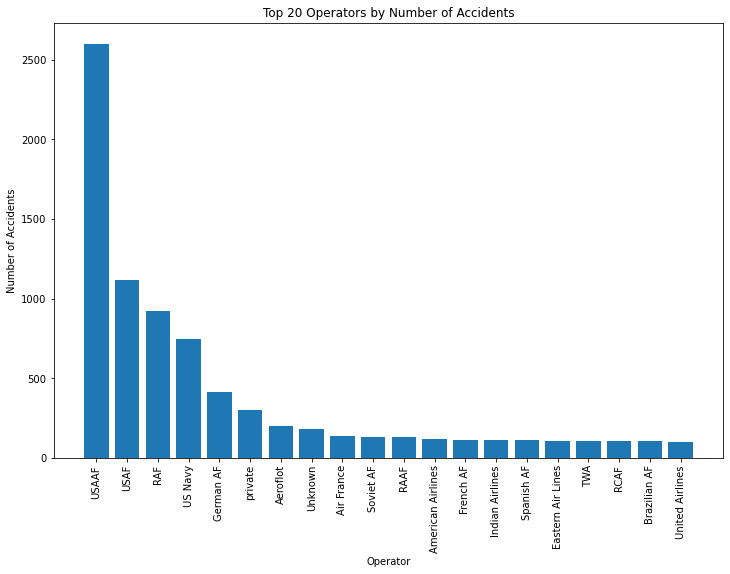

In [303]:
# Selecting top 20 operators with the most accidents
top_operators = accidents_per_operator.head(20)
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(top_operators.index, top_operators.values)
ax.set_title("Top 20 Operators by Number of Accidents")
ax.set_ylabel("Number of Accidents")
ax.set_xlabel("Operator")
plt.xticks(rotation=90)
plt.show()


# Insight
The bar chart highlights the top 20 operators by accident frequency:

A few operators dominate the list, with significantly higher accident counts compared to others.

This may be linked to factors such as: Operational regions challenging environments may contribute to higher risk.

Safety culture and compliance with aviation standards.

Operators with consistently high accident counts should be further investigated to determine whether structural safety issues or oversight gaps exist.

The graph shows that USAAF has the highest number of accidents. I would recommend travellers to avoid the operators

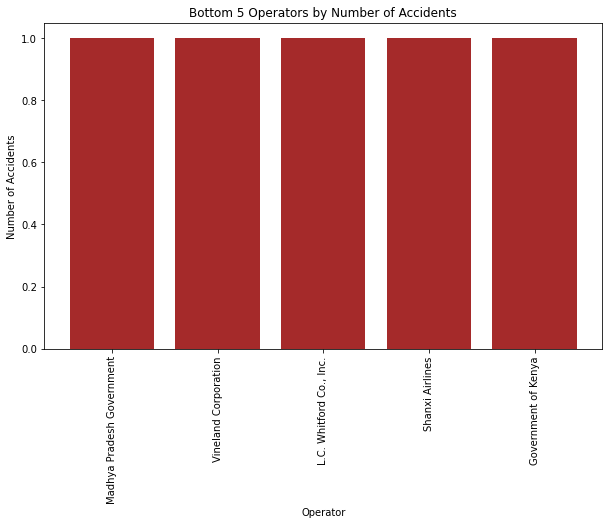

In [304]:
# Selecting bottom 5 operators with the fewest accidents
bottom_operators = accidents_per_operator.tail(5)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(bottom_operators.index, bottom_operators.values, color="brown")
ax.set_title("Bottom 5 Operators by Number of Accidents")
ax.set_ylabel("Number of Accidents")
ax.set_xlabel("Operator")
plt.xticks(rotation=90)
plt.show()


The graph above shows the airlines with the least number of accidents which travellers should consider while travelling.

# Objective
Which operator had the highest number of fatality and accident?
To compare the relationship between the number of accidents and the total fatalities for each operator. This helps identify whether operators with more accidents also tend to have higher fatality counts.

In [305]:
# Grouping accidents and fatalities by operator
operator_stats = data.groupby('operator').agg(
    accidents=('operator', 'count'),
    fatalities=('fatalities_sum', 'sum')
)

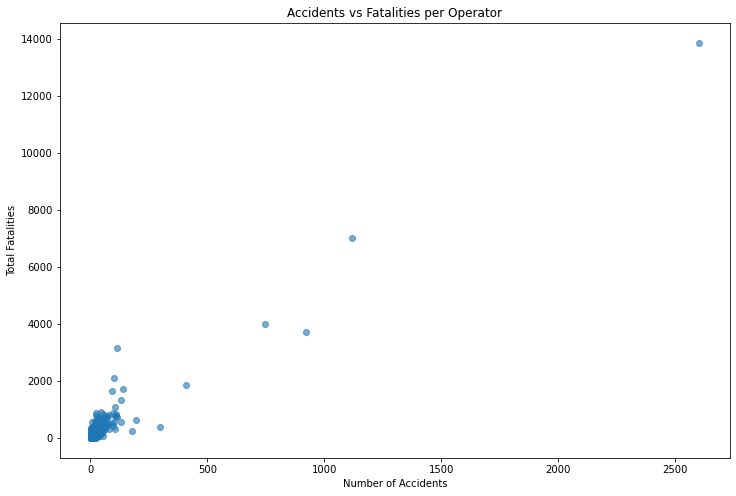

In [306]:
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot: x = accidents, y = fatalities
ax.scatter(
    operator_stats['accidents'],
    operator_stats['fatalities'],
    alpha=0.6
)
ax.set_title("Accidents vs Fatalities per Operator")
ax.set_xlabel("Number of Accidents")
ax.set_ylabel("Total Fatalities")

plt.show()


# Insight
Most operators cluster at the lower end (few accidents and relatively low fatalities).

A small number of operators appear as outliers with both high accident counts and high fatalities, raising potential concerns about safety standards.

Interestingly, some operators may have many accidents but relatively fewer fatalities, possibly due to non-fatal incidents or effective safety measures.

Conversely, a few operators with fewer accidents but very high fatalities might point to rare but catastrophic events.

The lower the number of accidents, the lower number of fatalities

# Objective
Which are the top 10 aircraft types frequently involved in accidents?


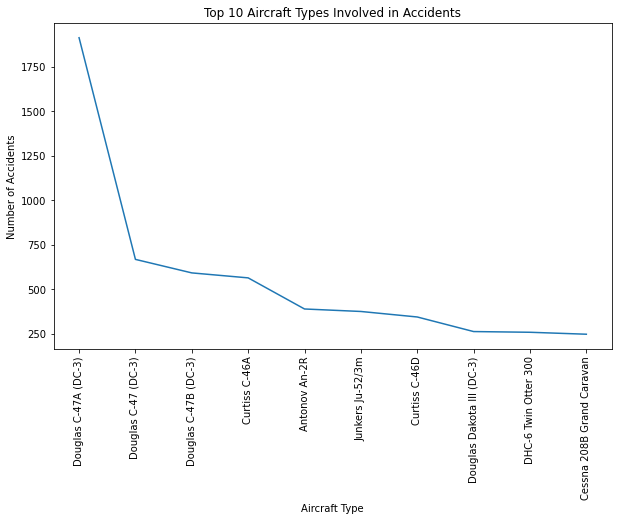

In [307]:
type_counts = data['type'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(type_counts.index, type_counts.values, linestyle='-')
ax.set_title("Top 10 Aircraft Types Involved in Accidents")
ax.set_xlabel("Aircraft Type")
ax.set_ylabel("Number of Accidents")
plt.xticks(rotation=90)
plt.show()


# Insight
The line graph shows that a few aircraft types stand out with significantly higher accident counts.

The sharp drop after the first few types suggests that only a small number of aircraft dominate accident statistics.

# Importing the cleaned data for future references

In [308]:
data.to_excel("cleaned_aviation_data.xlsx", index=False)


# Recommendation
* Regulators and airlines should prioritize safety audits, design evaluations, and maintenance checks for the top accident-prone aircraft models.
* Provide type-specific simulator training for pilots of frequently involved aircraft, ensuring they are prepared for known challenges (handling, navigation, emergency scenarios).
* Mandate stricter, standardized maintenance schedules across countries for the aircraft types with the most recorded accidents.
* Continuously analyze aviation accident data to track emerging risk patterns by aircraft type, allowing early intervention.
* Encourage phasing out older aircraft models that appear disproportionately in accident records, replacing them with newer, safer technology.

# CONCLUSION
1. In more recent years, accident counts appear to decline slightly, suggesting improvements in aviation safety.
2. A few operators appear disproportionately in the data, highlighting potential safety or operational concerns.
3. Most accident were normal accident but some accidents were caused by hajacking.
4. Certain aircraft types appear more frequently in accidents. This may be due to popularity (widely used models) rather than inherent flaws, but it still highlights where most risk exposure lies.
5. While not every accident results in deaths, many incidents involve significant fatalities, underlining aviation’s low survival rate once accidents occur.

